## mountaineer
**m**ountain **e**cology **e**volution **r**evolution
##### A program to download, visualize, and compare species occurrence records across mountain ranges.

In [1]:
import pandas as pd
import geopandas
import requests
import matplotlib.pyplot as plt
import folium
import capcomm
from pygbif import species

In [1]:
import capcomm

## Load data
converted original .shp files to .geojson using geopandas

<AxesSubplot:>

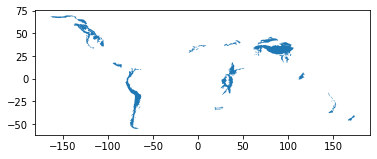

In [2]:
# "large-scale set" of mountain polygons (17 polygons represent largest continuous mountain ranges)
large = capcomm.data.load('large')
large.plot()

<AxesSubplot:>

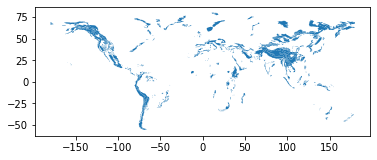

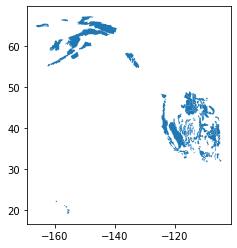

In [3]:
# Mountain polygons for "entire_world" (1,048 polygons)
world = capcomm.data.load('world')
world.plot()
world[world.Country == "United States of America"].plot()

## Dataset and Region class objects

<AxesSubplot:>

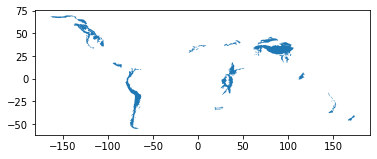

In [4]:
# create instance of Dataset class, which stores a list of Region class objects for each row in the GeoDataFrame
l = capcomm.Dataset(large)
l.gdf.plot()

Hindukush-Himalaya


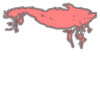

In [5]:
# view Region class by index (Himalaya)
print(l.regions[1].name)
l.regions[1].polygon

West Coast


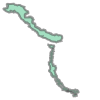

In [6]:
# view Region class by index (West Coast)
print(l.regions[12].name)
l.regions[12].polygon

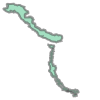

In [7]:
west_coast = l.regions[12]
west_coast.polygon

In [8]:
# load in geojson for world mountain regions
world = capcomm.load('world')
world

,Name,Country,geometry
0,Andes fueginos,"Argentina, Chile","POLYGON ((-74.67966 -52.74396, -73.11284 -53.3..."
1,Coastal Range (Chile) - North,Chile,"POLYGON ((-70.29936 -18.80892, -70.17639 -19.1..."
2,Coastal Range (Chile) - Central,Chile,"POLYGON ((-70.68959 -27.60910, -70.74517 -27.8..."
3,Coastal Range (Chile) - South,Chile,"MULTIPOLYGON (((-73.09070 -36.94712, -72.88633..."
4,Cordillera Patagonica Sur,"Argentina, Chile","POLYGON ((-73.70162 -46.05717, -73.61354 -45.9..."
...,...,...,...
1043,Serra do Acarai,"Brazil, Guyana","POLYGON ((-58.90928 1.38271, -58.84677 1.39243..."
1044,Serra do Tumucumaque,"Brazil, French Guiana, Suriname","POLYGON ((-55.13338 3.00820, -55.26115 3.02892..."
1045,Qaflankuh Mountain Range,Iran,"POLYGON ((48.17346 36.69134, 48.23437 36.68311..."
1046,Eshdeger Range,Iran,"POLYGON ((56.96070 34.03102, 57.13336 33.99994..."


1048

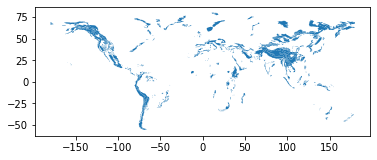

In [9]:
# create instance of Dataset class for entire world
w = capcomm.Dataset(world)
w.gdf.plot()
len(w.regions)

In [10]:
# filter Dataset.regions by country
w.filter_country("Chile")

,Name,Country,geometry
1,Coastal Range (Chile) - North,Chile,"POLYGON ((-70.29936 -18.80892, -70.17639 -19.1..."
2,Coastal Range (Chile) - Central,Chile,"POLYGON ((-70.68959 -27.60910, -70.74517 -27.8..."
3,Coastal Range (Chile) - South,Chile,"MULTIPOLYGON (((-73.09070 -36.94712, -72.88633..."
719,Pampa del Tamarugal,Chile,"POLYGON ((-70.17639 -19.10740, -70.02980 -19.0..."
720,Cordillera Domeyko,Chile,"POLYGON ((-69.06612 -24.63330, -69.13750 -24.4..."
1011,Salar de Atacama,Chile,"POLYGON ((-68.61803 -24.12960, -68.59023 -23.9..."


In [11]:
# filter Dataset.regions by name
w.filter_name("Abajo Peak")

,Name,Country,geometry
905,Abajo Peak,United States of America,"POLYGON ((-110.15975 37.22858, -110.15813 37.3..."


Abajo Peak


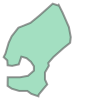

In [12]:
# select Region instance by index and store as new variable
abajo = w.regions[905]
print(abajo.name)
abajo.polygon

# Download species occurrences within Region

In [13]:
# get taxonKey info for taxon of interest
capcomm.taxon_info('Lupinus argenteus')

[{'key': 2964374,
  'kingdom': 'Plantae',
  'phylum': 'Tracheophyta',
  'order': 'Fabales',
  'family': 'Fabaceae',
  'genus': 'Lupinus',
  'species': 'Lupinus argenteus',
  'kingdomKey': 6,
  'phylumKey': 7707728,
  'classKey': 220,
  'orderKey': 1370,
  'familyKey': 5386,
  'genusKey': 2963774,
  'speciesKey': 2964374,
  'parent': 'Lupinus',
  'parentKey': 2963774,
  'nubKey': 2964374,
  'scientificName': 'Lupinus argenteus Pursh',
  'canonicalName': 'Lupinus argenteus',
  'rank': 'SPECIES',
  'status': 'ACCEPTED',
  'higherClassificationMap': {'6': 'Plantae',
   '7707728': 'Tracheophyta',
   '220': 'Magnoliopsida',
   '1370': 'Fabales',
   '5386': 'Fabaceae',
   '2963774': 'Lupinus'},
  'synonym': False,
  'class': 'Magnoliopsida'},
 {'key': 7849788,
  'kingdom': 'Plantae',
  'phylum': 'Tracheophyta',
  'order': 'Fabales',
  'family': 'Fabaceae',
  'genus': 'Lupinus',
  'species': 'Lupinus argenteus',
  'kingdomKey': 6,
  'phylumKey': 7707728,
  'classKey': 220,
  'orderKey': 1370,


In [14]:
# query GBIF for 5 occurrences of 'Lupinus argenteus' within the complete polygon of this mountain range
abajo.get_occurrences(taxonKey=2963774, limit=5, tol=0)

{'offset': 0,
 'limit': 5,
 'endOfRecords': False,
 'count': 50,
 'results': [{'key': 2626284258,
   'datasetKey': '50c9509d-22c7-4a22-a47d-8c48425ef4a7',
   'publishingOrgKey': '28eb1a3f-1c15-4a95-931a-4af90ecb574d',
   'installationKey': '997448a8-f762-11e1-a439-00145eb45e9a',
   'publishingCountry': 'US',
   'protocol': 'DWC_ARCHIVE',
   'lastCrawled': '2021-04-11T09:06:38.023+00:00',
   'lastParsed': '2021-04-11T11:43:53.465+00:00',
   'crawlId': 259,
   'hostingOrganizationKey': '28eb1a3f-1c15-4a95-931a-4af90ecb574d',
   'extensions': {'http://rs.gbif.org/terms/1.0/Multimedia': [{'http://purl.org/dc/terms/format': 'image/jpeg',
      'http://purl.org/dc/terms/license': 'http://creativecommons.org/publicdomain/zero/1.0/',
      'http://purl.org/dc/terms/created': '2020-05-14T19:11:11Z',
      'http://purl.org/dc/terms/rightsHolder': 'Robb Hannawacker',
      'http://purl.org/dc/terms/type': 'StillImage',
      'http://rs.tdwg.org/dwc/terms/catalogNumber': '72929038',
      'http://

Done. Found 50 records


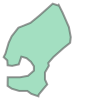

In [15]:
# query GBIF for all occurrences of 'Lupinus argenteus' within the complete polygon of this mountain range
a = abajo.get_all_occurrences(taxonKey=2963774, tol=0)
abajo.polygon

Done. Found 44 records


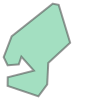

In [16]:
# query GBIF for all occurrences of 'Lupinus argenteus' within a simplified polygon of this mountain range (tol=0.05)
a = abajo.get_all_occurrences(taxonKey=2963774, tol=0.05)
abajo.polygon.simplify(tolerance=0.05)

Done. Found 23 records


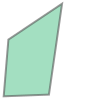

In [17]:
# query GBIF for all occurrences of 'Lupinus argenteus' within a simplified polygon of this mountain range (tol=0.5)
a = abajo.get_all_occurrences(taxonKey=2963774, tol=0.5)
abajo.polygon.simplify(tolerance=0.5)

In [18]:
# query GBIF for all occurrences of 'Plantae' within the complete polygon of this mountain range (tol=0)
a1 = abajo.get_all_occurrences(taxonKey=6, tol=0)

................Done. Found 4970 records


In [19]:
# convert to df and filter
df = abajo.convert_json_to_dataframe(a)
df

,kingdom,phylum,order,family,genus,species,longitude,latitude
0,Plantae,Tracheophyta,Fabales,Fabaceae,Lupinus,Lupinus pusillus,-109.730509,38.112397
1,Plantae,Tracheophyta,Fabales,Fabaceae,Lupinus,Lupinus argenteus,-109.796722,37.801333
2,Plantae,Tracheophyta,Fabales,Fabaceae,Lupinus,Lupinus argenteus,-109.747904,37.659011
3,Plantae,Tracheophyta,Fabales,Fabaceae,Lupinus,Lupinus argenteus,-109.772500,37.774444
4,Plantae,Tracheophyta,Fabales,Fabaceae,Lupinus,Lupinus argenteus,-109.772617,37.774533
5,Plantae,Tracheophyta,Fabales,Fabaceae,Lupinus,Lupinus argenteus,-109.772500,37.774444
6,Plantae,Tracheophyta,Fabales,Fabaceae,Lupinus,Lupinus argenteus,-109.773333,37.775000
7,Plantae,Tracheophyta,Fabales,Fabaceae,Lupinus,Lupinus pusillus,-109.811670,37.286110
8,Plantae,Tracheophyta,Fabales,Fabaceae,Lupinus,Lupinus caudatus,-109.833333,37.666667
9,Plantae,Tracheophyta,Fabales,Fabaceae,Lupinus,Lupinus caudatus,-109.833333,37.666667


In [19]:
# save DataFrame of occurrence records to csv
capcomm.save(df, 'abajo_plantae.csv')

   kingdom        phylum    order    family    genus            species  \
0  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus   Lupinus pusillus   
1  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus  Lupinus argenteus   
2  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus  Lupinus argenteus   
3  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus  Lupinus argenteus   
4  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus  Lupinus argenteus   

    longitude   latitude                     geometry  
0 -109.730509  38.112397  POINT (-109.73051 38.11240)  
1 -109.796722  37.801333  POINT (-109.79672 37.80133)  
2 -109.747904  37.659011  POINT (-109.74790 37.65901)  
3 -109.772500  37.774444  POINT (-109.77250 37.77444)  
4 -109.772617  37.774533  POINT (-109.77262 37.77453)  


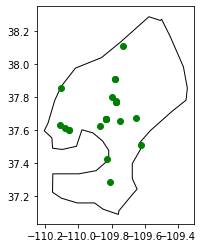

In [20]:
# plot occurrence records within Region
abajo.plot_with_mpl(df, region='Abajo Peak')

### explicit use of Region class object (rather than creating list of regions with Dataset instance)

In [37]:
w.filter_name('Hengduan Shan')

,Name,Country,geometry
236,Hengduan Shan,China,"POLYGON ((99.93899 27.03636, 99.97706 26.98877..."


In [26]:
hengduan = w.regions[236]

In [29]:
hengduan.polygon.__class__
#hengduan.__class__

shapely.geometry.polygon.Polygon

In [23]:
hengduan = capcomm.Region(name="Hengduan Shan", polygon=world.geometry[world.Name == "Hengduan Shan"])
hengduan

In [30]:
#hengduan.name
hengduan.polygon.__class__

shapely.geometry.polygon.Polygon

# Hengduan example

In [38]:
hengduan = w.regions[236]

In [ ]:
capcomm.taxon_info('Pedicularis')

Done. Found 85 records


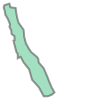

In [49]:
h = hengduan.get_all_occurrences(taxonKey=3171670, tol = 0.5)
hengduan.polygon

In [50]:
df = hengduan.convert_json_to_dataframe(h)
df

,kingdom,phylum,order,family,genus,species,longitude,latitude
0,Plantae,Tracheophyta,Lamiales,Orobanchaceae,Pedicularis,Pedicularis trichoglossa,98.956389,28.497222
1,Plantae,Tracheophyta,Lamiales,Orobanchaceae,Pedicularis,Pedicularis trichoglossa,98.948611,28.479722
2,Plantae,Tracheophyta,Lamiales,Orobanchaceae,Pedicularis,Pedicularis pseudoversicolor,98.948611,28.479722
3,Plantae,Tracheophyta,Lamiales,Orobanchaceae,Pedicularis,Pedicularis likiangensis,98.948611,28.479722
4,Plantae,Tracheophyta,Lamiales,Orobanchaceae,Pedicularis,Pedicularis rupicola,98.948611,28.479722
...,...,...,...,...,...,...,...,...
80,Plantae,Tracheophyta,Lamiales,Orobanchaceae,Pedicularis,NaN,99.905548,26.537043
81,Plantae,Tracheophyta,Lamiales,Orobanchaceae,Pedicularis,Pedicularis trichoglossa,99.040000,28.870000
82,Plantae,Tracheophyta,Lamiales,Orobanchaceae,Pedicularis,Pedicularis likiangensis,99.040000,28.870000
83,Plantae,Tracheophyta,Lamiales,Orobanchaceae,Pedicularis,Pedicularis trichoglossa,99.480000,27.730000


In [52]:
capcomm.save(df, 'hengduan_pedicularis')

   kingdom        phylum     order         family        genus  \
0  Plantae  Tracheophyta  Lamiales  Orobanchaceae  Pedicularis   
1  Plantae  Tracheophyta  Lamiales  Orobanchaceae  Pedicularis   
2  Plantae  Tracheophyta  Lamiales  Orobanchaceae  Pedicularis   
3  Plantae  Tracheophyta  Lamiales  Orobanchaceae  Pedicularis   
4  Plantae  Tracheophyta  Lamiales  Orobanchaceae  Pedicularis   

                        species  longitude   latitude  \
0      Pedicularis trichoglossa  98.956389  28.497222   
1      Pedicularis trichoglossa  98.948611  28.479722   
2  Pedicularis pseudoversicolor  98.948611  28.479722   
3      Pedicularis likiangensis  98.948611  28.479722   
4          Pedicularis rupicola  98.948611  28.479722   

                    geometry  
0  POINT (98.95639 28.49722)  
1  POINT (98.94861 28.47972)  
2  POINT (98.94861 28.47972)  
3  POINT (98.94861 28.47972)  
4  POINT (98.94861 28.47972)  


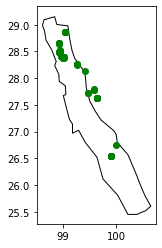

In [51]:
hengduan.plot_with_mpl(df, 'Hengduan Shan')

# Geographical vector objects
#### https://eaton-lab.org/hack-the-planet/tutorials/25.1-folium-vectors.html

In [1]:
import folium
import geopandas
import shapely
import pyproj
import geojson

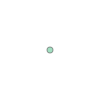

In [4]:
# create a Point instance
shapely.geometry.Point(44.0, -74.5)

# create a Polygon instance
#shapely.geometry.Polygon([
#    (44.0, -74), (45.0, -75), (45.0, -76), (43.0, -76),
#])

In [5]:
# create two points
point1 = shapely.geometry.Point(44.0, -74.5)
point2 = shapely.geometry.Point(43.0, -73.5)

# get linear distance between points
linear_dist = point1.distance(point2)
print(f"linear unit-less distance: {linear_dist:.2f}")

linear unit-less distance: 1.41


In [6]:
# get geodetic (great circle) projection object
geod = pyproj.Geod(ellps='WGS84')

# get results of projecting points to new space
angle1, angle2, distance = geod.inv(point1.x, point1.y, point2.x, point2.y)

# print results (divide by 1000 to get in units of kms)
print(f"WGS84 distance in Kilometers: {distance / 1000:.2f}")

WGS84 distance in Kilometers: 115.77


In [26]:
# fetch feature data from a large GeoJson file from a URL
geodata = geopandas.read_file("https://datahub.io/core/geo-ne-admin1/r/0.geojson")

# show the shape of the dataframe
print(geodata.shape)

# show the header of the dataframe
geodata.head()

(4647, 5)


,ISO3166-1-Alpha-3,country,id,name,geometry
0,ABW,Aruba,5150,Aruba,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,AFG,Afghanistan,1741,Badghis,"POLYGON ((64.30624 35.39722, 64.32468 35.40177..."
2,AFG,Afghanistan,1742,Hirat,"POLYGON ((61.36393 35.59824, 61.36548 35.59850..."
3,AFG,Afghanistan,1743,Bamyan,"POLYGON ((67.74391 35.44342, 67.75476 35.44412..."
4,AFG,Afghanistan,1744,Balkh,"POLYGON ((67.25913 37.18515, 67.28145 37.18866..."


In [29]:
# init a map instance
fmap = folium.Map()

# create a layer to hold several features
region = folium.FeatureGroup(name="Afghanistan")

# iterate over rows of 
for idx in geodata[geodata.country == "Afghanistan"].index:
    
    # init a GeoJson object from each geometry datum and add to afghan layer
    data = folium.GeoJson(
        data=geodata.loc[idx, "geometry"],
        tooltip=geodata.loc[idx, "name"],
    ).add_to(region)   
    
# add layer to the map
fmap.add_child(region)

# set bounds (location and zoom) on map to center on this region
fmap.fit_bounds(region.get_bounds())

# add layer toggle option
fmap.add_child(folium.LayerControl())

# show map
fmap